# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [9]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [56]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVE_OUTCOME_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,945.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,980.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,964.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,967.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,951.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_MATH_8_SCORE*

How many years of data are logged in our dataset? 

In [57]:
df.describe() #27 years are logged in our dataset from 1992 to 2019

,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVE_OUTCOME_SCORE
count,478.000000,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,...,408.000000,408.000000,3.570000e+02,4.080000e+02,4.080000e+02,478.000000,478.000000,478.000000,478.000000,478.000000
mean,2010.960251,9.451255e+05,1.115479e+07,1.022119e+06,5.121749e+06,5.010925e+06,1.126676e+07,5.824046e+06,3.301162e+06,5.025831e+05,...,73271.718137,66494.183824,5.810908e+05,2.902441e+05,9.727545e+05,239.089958,281.202929,220.202929,263.870293,1004.366109
std,5.236592,1.115594e+06,1.361662e+07,1.388952e+06,6.367098e+06,6.368771e+06,1.388169e+07,7.293471e+06,3.869866e+06,6.018313e+05,...,85925.825017,79291.892331,6.839154e+05,3.434656e+05,1.146026e+06,6.260778,8.026335,6.693549,6.513002,26.120946
min,1992.000000,4.417900e+04,8.010080e+05,7.585600e+04,0.000000e+00,3.518200e+04,8.053620e+05,3.306980e+05,2.394350e+05,2.760800e+04,...,4328.000000,2971.000000,3.769800e+04,1.682800e+04,6.943300e+04,205.000000,243.000000,188.000000,238.000000,875.000000
25%,2007.000000,2.720700e+05,2.778564e+06,2.959680e+05,1.546600e+06,1.013658e+06,2.708776e+06,1.431522e+06,8.521450e+05,1.311770e+05,...,20664.000000,18481.500000,1.649980e+05,8.091225e+04,2.792678e+05,236.000000,277.000000,216.000000,260.000000,989.000000
50%,2011.000000,6.651090e+05,6.706922e+06,6.364360e+05,3.232013e+06,2.523155e+06,6.715011e+06,3.383909e+06,2.067538e+06,3.563890e+05,...,50194.500000,42046.500000,4.052620e+05,1.895780e+05,6.810080e+05,240.000000,282.000000,221.000000,265.000000,1009.500000
75%,2015.000000,1.028259e+06,1.299936e+07,1.116670e+06,6.339782e+06,5.903450e+06,1.275760e+07,6.899346e+06,3.750687e+06,5.778670e+05,...,81853.750000,80651.000000,6.567970e+05,3.325872e+05,1.087134e+06,243.000000,286.000000,225.000000,268.000000,1021.750000
max,2019.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,500143.000000,498403.000000,3.929869e+06,2.011865e+06,6.437202e+06,253.000000,301.000000,237.000000,280.000000,1064.000000


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [64]:
mich = df[df["STATE"] == "MICHIGAN"]
mich_ave = mich["AVG_MATH_8_SCORE"].mean()
ohio = df[df["STATE"] == "OHIO"]
ohio_ave = ohio["AVG_MATH_8_SCORE"].mean()
print("ohio's average outcome score is " + str(ohio_ave))
print("michigans's average outcome score is " + str(mich_ave))

ohio's average outcome score is 286.0
michigans's average outcome score is 278.44444444444446


Find the average for your outcome score across all states in 2019

In [66]:
states = df.groupby("STATE")
states["AVG_MATH_8_SCORE"].mean()

STATE
ALABAMA                 266.777778
ALASKA                  280.000000
ARIZONA                 278.000000
ARKANSAS                274.222222
CALIFORNIA              272.555556
COLORADO                286.222222
CONNECTICUT             284.666667
DELAWARE                280.555556
DISTRICT_OF_COLUMBIA    257.000000
DODEA                   288.333333
FLORIDA                 277.000000
GEORGIA                 276.777778
HAWAII                  273.888889
IDAHO                   284.333333
ILLINOIS                281.333333
INDIANA                 285.444444
IOWA                    284.555556
KANSAS                  286.444444
KENTUCKY                278.111111
LOUISIANA               270.111111
MAINE                   284.888889
MARYLAND                283.222222
MASSACHUSETTS           296.000000
MICHIGAN                278.444444
MINNESOTA               292.888889
MISSISSIPPI             267.666667
MISSOURI                281.111111
MONTANA                 287.777778
NATIONAL      

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [67]:
states["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [148]:
# this is the ratio of how much each state spends each year on instruction
df["INSTRUCT_TOTAL_RATIO"] = (df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_EXPENDITURE"])
# this is the ratio of how much each state spends each year on support services
df["SUPPORT_TOTAL_RATIO"] = (df["SUPPORT_SERVICES_EXPENDITURE"] / df["TOTAL_EXPENDITURE"])
# this is the instruction expenditure per student
df["EXPENSE_PER_STUD"] = df["TOTAL_EXPENDITURE"] / df["ENROLL_ALL"]
df.describe()

,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVE_OUTCOME_SCORE,INSTRUCT_TOTAL_RATIO,INSTRUCT_PER_STUD,SUPPORT_TOTAL_RATIO,EXPENSE_PER_STUD
count,478.000000,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,3.570000e+02,...,4.080000e+02,478.000000,478.000000,478.000000,478.000000,478.000000,357.000000,357.000000,357.000000,357.000000
mean,2010.960251,9.451255e+05,1.115479e+07,1.022119e+06,5.121749e+06,5.010925e+06,1.126676e+07,5.824046e+06,3.301162e+06,5.025831e+05,...,9.727545e+05,239.089958,281.202929,220.202929,263.870293,1004.366109,0.514704,11.716790,0.301084,11.716790
std,5.236592,1.115594e+06,1.361662e+07,1.388952e+06,6.367098e+06,6.368771e+06,1.388169e+07,7.293471e+06,3.869866e+06,6.018313e+05,...,1.146026e+06,6.260778,8.026335,6.693549,6.513002,26.120946,0.039450,3.340506,0.029497,3.340506
min,1992.000000,4.417900e+04,8.010080e+05,7.585600e+04,0.000000e+00,3.518200e+04,8.053620e+05,3.306980e+05,2.394350e+05,2.760800e+04,...,6.943300e+04,205.000000,243.000000,188.000000,238.000000,875.000000,0.404868,5.963684,0.228211,5.963684
25%,2007.000000,2.720700e+05,2.778564e+06,2.959680e+05,1.546600e+06,1.013658e+06,2.708776e+06,1.431522e+06,8.521450e+05,1.311770e+05,...,2.792678e+05,236.000000,277.000000,216.000000,260.000000,989.000000,0.486720,9.388499,0.282922,9.388499
50%,2011.000000,6.651090e+05,6.706922e+06,6.364360e+05,3.232013e+06,2.523155e+06,6.715011e+06,3.383909e+06,2.067538e+06,3.563890e+05,...,6.810080e+05,240.000000,282.000000,221.000000,265.000000,1009.500000,0.511593,11.045665,0.301158,11.045665
75%,2015.000000,1.028259e+06,1.299936e+07,1.116670e+06,6.339782e+06,5.903450e+06,1.275760e+07,6.899346e+06,3.750687e+06,5.778670e+05,...,1.087134e+06,243.000000,286.000000,225.000000,268.000000,1021.750000,0.543399,13.143379,0.320589,13.143379
max,2019.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,6.437202e+06,253.000000,301.000000,237.000000,280.000000,1064.000000,0.644512,24.005741,0.459578,24.005741


Feature engineering justification: **Basically I wanted to see how the different ratios of spending affected overall preformace I also wanted to look at expenditure per student as well because I was interested**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

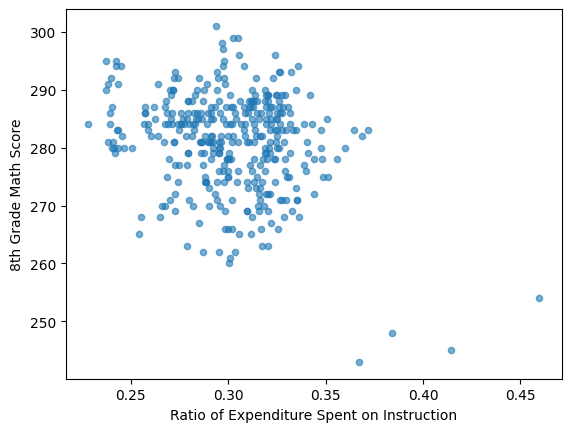

In [149]:
df.plot.scatter(x='SUPPORT_TOTAL_RATIO', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Ratio of Expenditure Spent on Instruction')
plt.ylabel('8th Grade Math Score')

**This scatter plot looks like it has a medium negative linear correlation with no super apparent outliers **

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

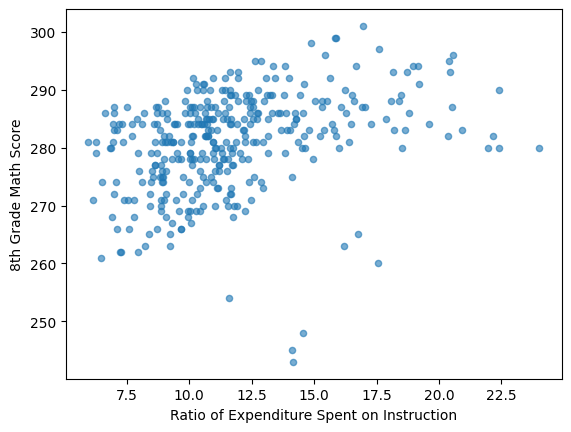

In [150]:
df.plot.scatter(x='EXPENSE_PER_STUD', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Ratio of Expenditure Spent on Instruction')
plt.ylabel('8th Grade Math Score')

**This correlation looks like a medium positive linear relationship with maybe some outliers towards the very bottom of the graph**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
X = df[['SUPPORT_TOTAL_RATIO']].dropna()
Z = df[['EXPENSE_PER_STUD']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']
y2 = df.loc[Z.index]['AVG_MATH_8_SCORE']

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
Z_train, Z_test, y2_train, y2_test = train_test_split(Z, y2, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
# create your model here
model = LinearRegression()
model2 = LinearRegression()

In [188]:
model.fit(X_train, y_train)
model2.fit(Z_train, y2_train)

LinearRegression()

In [189]:
y_pred = model.predict(X_test)
y2_pred = model2.predict(Z_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [191]:
print(model.score(X_test, y_test))
print(model2.score(Z_test, y2_test))

0.012914215113418281
0.15805660252654452


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

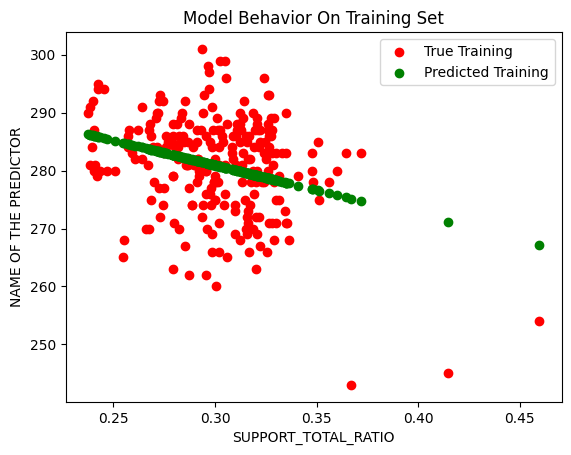

In [193]:
col_name = 'SUPPORT_TOTAL_RATIO'

f = plt.Figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

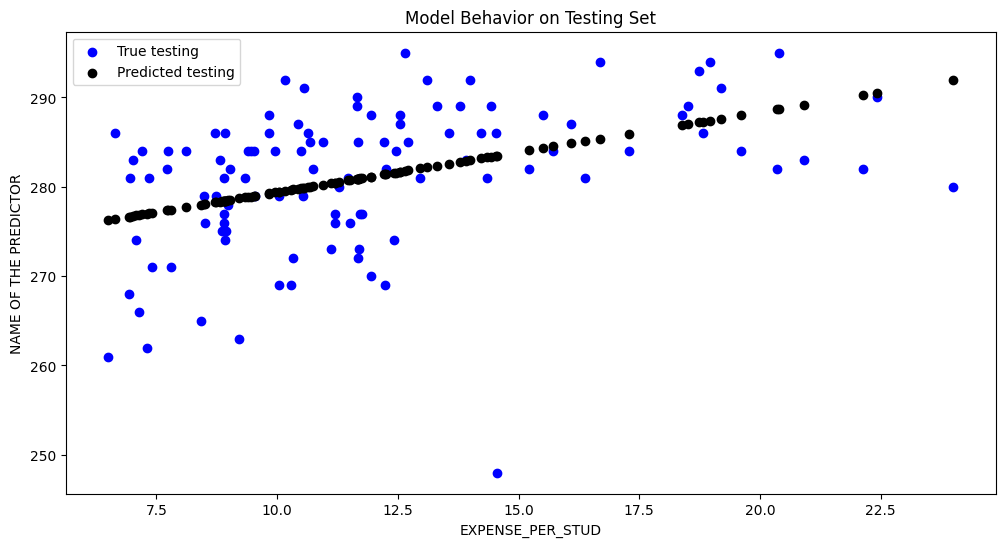

In [195]:
col_name = 'EXPENSE_PER_STUD'

f = plt.figure(figsize=(12,6))
plt.scatter(Z_test[col_name], y2_test, color = "blue")
plt.scatter(Z_test[col_name], model2.predict(Z_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**Overall, What I wanted to look at was which seems to be better at describing the data, how a state spends the money or how much it spends per student? So, I created some features that would help me: the ratio of money spent on support and the amount of money spent per student. Then, I tested those features on the data to see how well it performed. Based on R^2 values it seemed that the amount of money spent per student seemed to be more important than how the money was spent based on simple testing. Moreover, the models look like they didn't do a very good job with R^2 values of 0.012, and 0.15, respectively. If I was to give a recommendation to a state based on these findings I would worry more about giving a larger education budget in general rather than worrying about how the money itself is spent.**